In [ ]:
# Importing Required Dependencies

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
import os
import numpy as np
np.random.seed(1000)
import cv2

In [ ]:
#Initializing the shape of the MyNet 


def MyNet(width = 256, height = 256, depth =24, classes = 6):

    #  Create a sequential model
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Pooling 
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(4096, input_shape=(256*256*3,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    return model

In [ ]:
# Importing the datasets as required

data_dir = "Dataset/"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [ ]:
# Data Augmentation Steps

batch_size = 64

datagen_train = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
# Train Data Augmentation

generator_train = datagen_train.flow_from_directory(directory=train_dir,batch_size=batch_size,target_size=(256,256),
                                                    shuffle = True,class_mode = 'categorical')

In [6]:
# Test Data Augmentation

generator_test = datagen_test.flow_from_directory(  directory=test_dir,batch_size=batch_size,target_size=(256,256),
                                                  class_mode = 'categorical',shuffle = False)

Found 335 images belonging to 3 classes.


In [7]:
steps_test = generator_test.n 

In [8]:
print(steps_test)

335


In [9]:
# Definining the number of iterations

epochs = 25
steps_per_epoch = 50
print(steps_per_epoch)

50


In [10]:
# Initializing the model
model = MyNet(256,256,24,3)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 21, 21, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 256)       0         
__________

In [11]:
# Initialising Optimizer

Adam = keras.optimizers.adam(lr=0.001, amsgrad = True)
model.compile(loss='categorical_crossentropy', 
              optimizer= Adam,metrics=['accuracy'])

In [12]:
#Fitting the model

history= model.fit_generator(generator_train,epochs=epochs,steps_per_epoch=steps_per_epoch,
                             validation_data = generator_test,validation_steps = steps_test)

Epoch 1/25
50/50 [==============================] - 189s 4s/step - loss: 1.4922 - acc: 0.4231 - val_loss: 2.9001 - val_acc: 0.3672
Epoch 2/25
50/50 [==============================] - 163s 3s/step - loss: 1.1739 - acc: 0.4491 - val_loss: 6.4748 - val_acc: 0.3145
Epoch 3/25
50/50 [==============================] - 162s 3s/step - loss: 1.1475 - acc: 0.4400 - val_loss: 1.4537 - val_acc: 0.4095
Epoch 4/25
50/50 [==============================] - 162s 3s/step - loss: 1.1184 - acc: 0.4426 - val_loss: 1.5778 - val_acc: 0.4684
Epoch 5/25
50/50 [==============================] - 162s 3s/step - loss: 1.0677 - acc: 0.4594 - val_loss: 1.2745 - val_acc: 0.4027
Epoch 6/25
50/50 [==============================] - 165s 3s/step - loss: 1.0520 - acc: 0.4637 - val_loss: 1.0093 - val_acc: 0.4574
Epoch 7/25
50/50 [==============================] - 168s 3s/step - loss: 1.0533 - acc: 0.4499 - val_loss: 1.6687 - val_acc: 0.3854
Epoch 8/25
50/50 [==============================] - 160s 3s/step - loss: 1.0522 - a

Text(0.5,1,'Loss Curves')

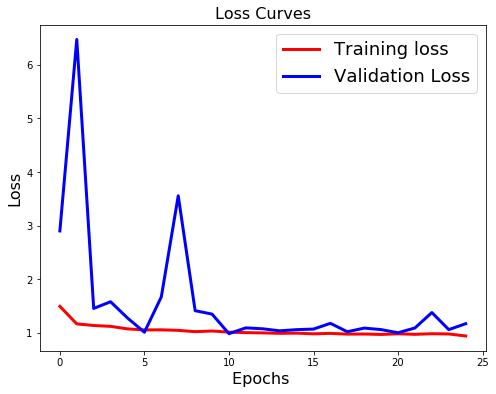

In [13]:
# Plotting the Loss Curves for Training and Validation

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

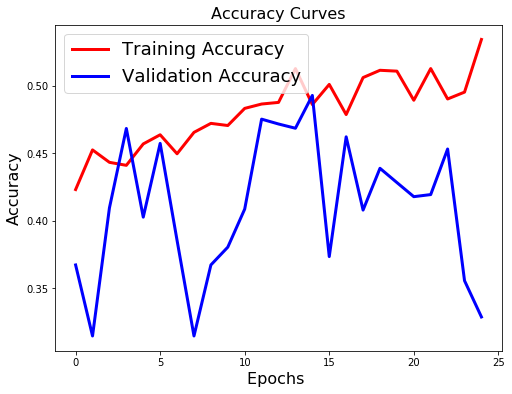

In [14]:
# Plotting the Accuracy Curves for Training and Validation

plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)